# 개인 프로젝트 : CIFAR-10 데이터 분류

- [코드 참고 1](https://buomsoo-kim.github.io/keras/2019/07/30/Easy-deep-learning-with-Keras-21.md/)
- [코드 참고 2](https://excelsior-cjh.tistory.com/152)
- [코드 참고 3](https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/)
- [코드 참고 4](https://datascienceschool.net/view-notebook/8fc58d2c1ffc420dac44eafee7b28cea/)

## 필요 라이브러리 호출

In [23]:
from sklearn.metrics import accuracy_score
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.regularizers import l2
from IPython.display import Image

import numpy as np 
import os

## 데이터 불러오기

In [2]:
# 데이터 로드 
(X_train, y_train0), (X_test, y_test0) = cifar10.load_data()

In [3]:
# 총 데이터 

print(X_train.shape, X_train.dtype, X_train[0][0][0])
print(X_test.shape, X_test.dtype)
print(y_train0.shape, y_train0.dtype )
print(y_test0.shape, y_test0.dtype )

(50000, 32, 32, 3) uint8 [59 62 63]
(10000, 32, 32, 3) uint8
(50000, 1) uint8
(10000, 1) int32


## 데이터 확인

In [4]:
# 이미지 그래프로 확인
import matplotlib.pyplot as plt

plt.subplot(141)
plt.imshow(X_train[6], interpolation="bicubic")
plt.subplot(142)
plt.imshow(X_train[60], interpolation="bicubic")
plt.subplot(143)
plt.imshow(X_train[600], interpolation="bicubic")
plt.subplot(144)
plt.imshow(X_train[6000], interpolation="bicubic")
plt.show()

<Figure size 1600x900 with 4 Axes>

## 데이터 변환 및 스케일링

In [5]:
X_train = X_train.astype('float32') / 255.0  # 0~1사이의 값으로 변환 
X_test = X_test.astype('float32') / 255.0
y_train = np_utils.to_categorical(y_train0, 10)
y_test = np_utils.to_categorical(y_test0, 10)

In [6]:
print(X_train.shape, X_train.dtype, X_train[0][0][0] )

(50000, 32, 32, 3) float32 [0.23137255 0.24313726 0.24705882]


In [7]:
print(y_train[:4])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## 모델 1 생성 및 컴파일

In [12]:
np.random.seed(0)

model = Sequential([
    
    Conv2D(32, (5,5), padding='same', input_shape=(32, 32, 3), activation='relu', kernel_regularizer=l2(0.001)),
    Conv2D(32, (5,5), padding='same', activation='relu'), # elu, Leaky Relu(LRelu), Randomized Relu(RRelu)
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.2),
    
    Conv2D(64, (5,5), padding='same', activation='relu', kernel_regularizer=l2(0.001)), # L2 규제 
    Conv2D(64, (5,5), padding='same', activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.3),
    
    Conv2D(128, (5,5), padding='same', activation='relu', kernel_regularizer=l2(0.001)),
    Conv2D(128, (5,5), padding='same', activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.4),     
    
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(.5), 
    Dense(10, activation='softmax')
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        51264     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        102464    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [13]:
# 모델 컴파일 
model.compile(loss='categorical_crossentropy', 
                        optimizer='adam',  # 'adadelta'
                        metrics=['accuracy'])

## 모델 최적화

In [14]:
MODEL_DIR = './CNN_cifar10_adam_model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./CNN_cifar10_adam_model/{epoch:02d}-{val_loss:.4f}.hdf5"
    
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [15]:
history = model.fit(X_train, y_train, batch_size=100, epochs=50, validation_data=[X_test, y_test],
          verbose=1, callbacks=[early_stopping_callback, checkpoint])

W0820 13:49:35.002697  1864 deprecation.py:323] From C:\AN\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 344s 7ms/step - loss: 2.1054 - acc: 0.2751 - val_loss: 1.7039 - val_acc: 0.4039

Epoch 00001: val_loss improved from inf to 1.70388, saving model to ./CNN_cifar10_adam_model/01-1.7039.hdf5
Epoch 2/100
50000/50000 [==============================] - 318s 6ms/step - loss: 1.6603 - acc: 0.4178 - val_loss: 1.5171 - val_acc: 0.4781

Epoch 00002: val_loss improved from 1.70388 to 1.51712, saving model to ./CNN_cifar10_adam_model/02-1.5171.hdf5
Epoch 3/100
50000/50000 [==============================] - 332s 7ms/step - loss: 1.5263 - acc: 0.4791 - val_loss: 1.3906 - val_acc: 0.5200

Epoch 00003: val_loss improved from 1.51712 to 1.39062, saving model to ./CNN_cifar10_adam_model/03-1.3906.hdf5
Epoch 4/100
50000/50000 [==============================] - 333s 7ms/step - loss: 1.4361 - acc: 0.5216 - val_loss: 1.3045 - val_acc: 0.5692

Epoch 00004: val_loss improved from 1.39062 to 1.30451, sa

50000/50000 [==============================] - 354s 7ms/step - loss: 0.9279 - acc: 0.7571 - val_loss: 0.8570 - val_acc: 0.7763

Epoch 00037: val_loss improved from 0.85783 to 0.85703, saving model to ./CNN_cifar10_adam_model/37-0.8570.hdf5
Epoch 38/100
50000/50000 [==============================] - 352s 7ms/step - loss: 0.9209 - acc: 0.7596 - val_loss: 0.8755 - val_acc: 0.7715

Epoch 00038: val_loss did not improve from 0.85703
Epoch 39/100
50000/50000 [==============================] - 339s 7ms/step - loss: 0.9233 - acc: 0.7579 - val_loss: 0.8578 - val_acc: 0.7782

Epoch 00039: val_loss did not improve from 0.85703
Epoch 40/100
50000/50000 [==============================] - 333s 7ms/step - loss: 0.9210 - acc: 0.7587 - val_loss: 0.8682 - val_acc: 0.7719

Epoch 00040: val_loss did not improve from 0.85703
Epoch 41/100
50000/50000 [==============================] - 318s 6ms/step - loss: 0.9151 - acc: 0.7628 - val_loss: 0.8534 - val_acc: 0.7832

Epoch 00041: val_loss improved from 0.85703

## 모델 예측 정확도 

In [16]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

10000/10000 [==============================] - 9s 918us/step

 Test Accuracy: 0.7672


## 모델 학습 과정 시각화

In [104]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_fname = 'C:/Windows/Fonts/NanumGothic.ttf'  # 원하는 폰트 
font_family = fm.FontProperties(fname=font_fname).get_name()

%matplotlib inline 

In [105]:
y_loss = history.history['loss']        # 훈련 손실값
y_vloss = history.history['val_loss']   # 검증 손실값

y_acc = history.history['acc']          # 훈련 정확도 
y_vacc = history.history['val_acc']     # 검증 정확도

x_len = np.arange(1, len(y_loss)+1)     # x축 

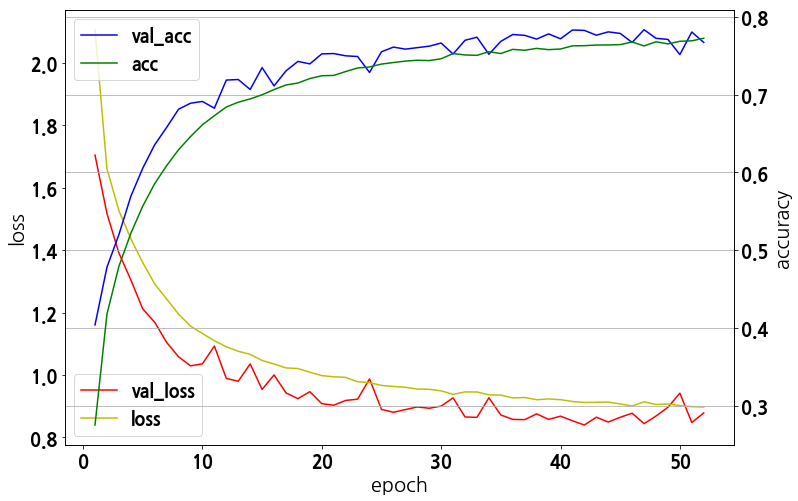

In [106]:
plt.rcParams["font.size"] = 18
plt.figure(figsize=(12, 8))

ax1, ax2= plt.gca(), plt.gca().twinx() # 원래 주어진 axis, x를 공유하는 쌍둥이 axis 
ax1.plot(x_len, y_vloss, color='red', label='val_loss')
ax1.plot(x_len, y_loss, color='y', label='loss')
ax2.plot(x_len, y_vacc, color='b', label='val_acc')
ax2.plot(x_len, y_acc, color='g', label='acc')

ax1.set_xlabel('epoch', size=20)  # 라벨 설정 
ax1.set_ylabel('loss', size=20)
ax2.set_ylabel('accuracy', size=20)

ax1.legend(loc='lower left')
ax2.legend(loc='upper left')

plt.grid()
plt.show()

## 모델 2

In [107]:
np.random.seed(0)

model2 = Sequential([
    
    Conv2D(32, (3,3), padding='same', input_shape=(32, 32, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.2),
    
    Conv2D(64, (3,3), padding='same', activation='relu', kernel_regularizer=l2(0.001)), # L2 규제 
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.3),
    
    Conv2D(128, (3,3), padding='same', activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.4),     
    
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(.5), 
    Dense(10, activation='softmax')
])

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_49 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_65 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_50 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 8, 8, 64)          0         
__________

In [108]:
# 모델 컴파일 
model2.compile(loss='categorical_crossentropy', 
                        optimizer='adam',  # 'adadelta'
                        metrics=['accuracy'])

In [109]:
MODEL_DIR = './CNN_cifar10_adam_model_2/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./CNN_cifar10_adam_model_2/{epoch:02d}-{val_loss:.4f}.hdf5"
    
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [110]:
history2 = model2.fit(X_train, y_train, batch_size=50, epochs=50, validation_data=[X_test, y_test],
          verbose=1, callbacks=[early_stopping_callback, checkpoint])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 160s 3ms/step - loss: 2.1730 - acc: 0.3291 - val_loss: 1.7348 - val_acc: 0.5006

Epoch 00001: val_loss improved from inf to 1.73479, saving model to ./CNN_cifar10_adam_model_2/01-1.7348.hdf5
Epoch 2/50
50000/50000 [==============================] - 156s 3ms/step - loss: 1.7419 - acc: 0.4684 - val_loss: 1.5815 - val_acc: 0.5204

Epoch 00002: val_loss improved from 1.73479 to 1.58147, saving model to ./CNN_cifar10_adam_model_2/02-1.5815.hdf5
Epoch 3/50
50000/50000 [==============================] - 161s 3ms/step - loss: 1.5757 - acc: 0.5386 - val_loss: 1.4985 - val_acc: 0.5516

Epoch 00003: val_loss improved from 1.58147 to 1.49851, saving model to ./CNN_cifar10_adam_model_2/03-1.4985.hdf5
Epoch 4/50
50000/50000 [==============================] - 170s 3ms/step - loss: 1.4951 - acc: 0.5831 - val_loss: 1.3575 - val_acc: 0.6397

Epoch 00004: val_loss improved from 1.49851 to 1.35747, 

OSError: Unable to create file (unable to open file: name = './CNN_cifar10_adam_model_2/07-1.2078.hdf5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 302)